<a href="https://colab.research.google.com/github/ffer200395/ML-course/blob/main/4_Imagen_D%C3%ADgitos_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
# Cargamos los datos de dígitos
data = load_digits().data

In [ ]:
# Cada una de las imágenes está compuesta por 8x8 píxeles
load_digits().images.shape

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

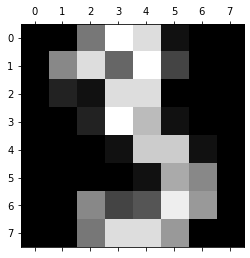

In [ ]:
# Mostamos una imágen de ejemplo de nuestro dataset
plt.gray()
plt.matshow(load_digits().images[3])
plt.show()

In [ ]:
# Las imágenes han sido transformadas en vectores de longitud 64 (8x8 pixeles)
data.shape

(1797, 64)

In [ ]:
# El target es la variable dependiente
load_digits().target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Creamos las variables X e y (vectores de imágenes y su correspondiente etiqueta)
X, y = data, load_digits().target

In [ ]:
# Vemos que los valores no están normalizados
X[4]

array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
        0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
        7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
        0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
       15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.])

In [ ]:
# Normalizamos dividiendo entre el valor máximo
X = X/16

In [ ]:
X[4]

array([0.    , 0.    , 0.    , 0.0625, 0.6875, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.4375, 0.5   , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.8125, 0.375 , 0.125 , 0.125 , 0.    ,
       0.    , 0.    , 0.4375, 0.9375, 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.3125, 1.    , 0.625 , 0.    , 1.    , 0.375 , 0.    ,
       0.    , 0.25  , 0.9375, 1.    , 0.8125, 1.    , 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.1875, 0.9375, 0.625 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.125 , 1.    , 0.25  , 0.    , 0.    ])

In [ ]:
# Rompemos el dataset en los conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Especificamos el estimador así como los hiperparámetros del mismo dónde realizar la búsqueda
estimator = RandomForestClassifier()
hp = dict(criterion = ['gini', 'entropy'], n_estimators = range(10,260,10), max_depth = range(2,32,2))

In [ ]:
# Vamos a realizar una búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator, hp, random_state=42, n_iter = 20, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...criterion=entropy, max_depth=12, n_estimators=70; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=70; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=70; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=70; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=70; total time=   0.3s
[CV] END ......criterion=gini, max_depth=30, n_estimators=80; total time=   0.3s
[CV] END ......criterion=gini, max_depth=30, n_estimators=80; total time=   0.3s
[CV] END ......criterion=gini, max_depth=30, n_estimators=80; total time=   0.3s
[CV] END ......criterion=gini, max_depth=30, n_estimators=80; total time=   0.3s
[CV] END ......criterion=gini, max_depth=30, n_estimators=80; total time=   0.3s
[CV] END ......criterion=gini, max_depth=12, n_estimators=90; total time=   0.3s
[CV] END ......criterion=gini, max_depth=12, n_

In [ ]:
# Mejor combinación encontrada sobre un muestreo aleatorio de tamaño 20
random_search.best_params_

{'n_estimators': 130, 'max_depth': 30, 'criterion': 'gini'}

In [ ]:
# Resultado obtenido sobre la validación cruzada de 5 plieges
random_search.best_score_

0.979123112659698

In [ ]:
# Aplicamos el modelo sobre los conjuntos de entrenamiento y testeo
yhat_train = random_search.predict(X_train)
yhat_test = random_search.predict(X_test)

In [ ]:
# Evaluamos los resultados obtenidos
print(f'Accuracy: {np.round(accuracy_score(y_train,yhat_train),2)}')
print(classification_report(y_train,yhat_train))
print(f'Accuracy: {np.round(accuracy_score(y_test,yhat_test),2)}')
print(classification_report(y_test,yhat_test))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00      

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, yhat_test)
cm_df = pd.DataFrame(cm)

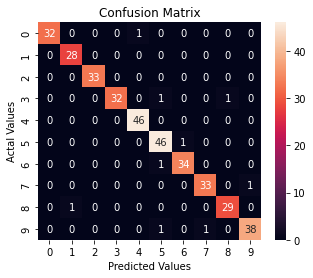

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import plot_model
from keras.metrics import *
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [ ]:
# Especificamos las capas que compondrán la red
capa_input = Input(shape=(64,)) # 64 porque las imágenes fueron transformadas a vectores de longitud 64 (8x8)
capa_intermedia = Dense(units = 30, activation = 'relu', kernel_initializer = 'he_uniform')
capa_dropout = Dropout(.1)
capa_output = Dense(units = 10, activation='softmax') # Capa con 10 nodos y función de activación softmax ya que estamos ante un problema de clasificación multiclase

In [ ]:
# Añadir cada una de las capas al modelo
model = Sequential()
model.add(capa_input)
model.add(capa_intermedia)
model.add(capa_dropout)
model.add(capa_output)

In [ ]:
# Compilamos el modelo
METRICS = ['accuracy', Precision(name='precision')]
model.compile('adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Stopping condition
stop_early = EarlyStopping(monitor="accuracy", patience=4, min_delta=0.01)

history = model.fit(X_train, pd.get_dummies(y_train), validation_split=.2, epochs=50, shuffle = True, verbose=1, batch_size=32,callbacks = [stop_early])

Epoch 1/50
36/36 [==============================] - 1s 8ms/step - loss: 2.2295 - accuracy: 0.1880 - val_loss: 2.0285 - val_accuracy: 0.3507
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.9221 - accuracy: 0.3838 - val_loss: 1.7648 - val_accuracy: 0.5278
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 1.6494 - accuracy: 0.5822 - val_loss: 1.4926 - val_accuracy: 0.7257
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3871 - accuracy: 0.6928 - val_loss: 1.2405 - val_accuracy: 0.7951
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 1.1878 - accuracy: 0.7502 - val_loss: 1.0339 - val_accuracy: 0.8368
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 1.0037 - accuracy: 0.8120 - val_loss: 0.8737 - val_accuracy: 0.8472
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 0.8562 - accuracy: 0.8303 - val_loss: 0.7540 - val_accuracy: 0.8646
Epoch 8/50
36/36 [==

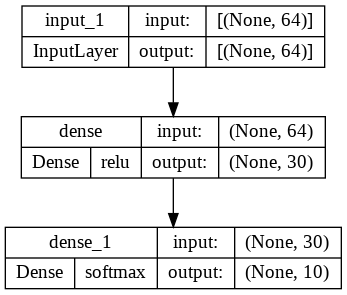

In [ ]:
# Model architecture
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
history.history

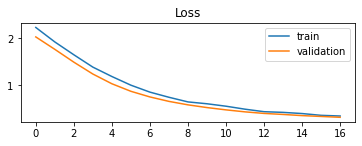

In [ ]:
# Plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

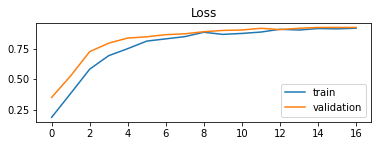

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [ ]:
test_metrics = model.evaluate(X_test, pd.get_dummies(y_test), verbose=0)

In [ ]:
test_metrics

[0.27709925174713135, 0.9416666626930237]

In [ ]:
yhat = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
yhat[0]

array([1.6172096e-03, 2.1754890e-03, 5.5405888e-04, 4.3956599e-05,
       1.1292785e-02, 1.6082529e-03, 9.7568506e-01, 3.7922332e-04,
       6.0345558e-03, 6.0938252e-04], dtype=float32)

In [ ]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

# Búsqueda de hiperparámetros en Keras

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Input(shape=(64,)))
  model.add(Dense(units = hp.Choice('units', [4,8,16,32,64]),
                  activation = hp.Choice('activation', ['relu', 'sigmoid','tanh']),
                  kernel_initializer = 'he_uniform'))
  model.add(Dropout(hp.Choice('rate', [0.1,0.2])))
  model.add(Dense(units = 10, activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = hp.Choice('optimizer', ['SGD', 'adam']), metrics=['accuracy'])
  return model

In [ ]:
# Search of hyperparameters
tuner = kt.BayesianOptimization(build_model, objective = kt.Objective("val_accuracy", direction="max"), max_trials=20, overwrite=True)
tuner.search(X_train, pd.get_dummies(y_train), epochs=20, validation_split=0.2, callbacks=[stop_early], batch_size=32, shuffle=True, verbose=1)

Trial 20 Complete [00h 00m 05s]
val_accuracy: 0.9409722089767456

Best val_accuracy So Far: 0.9444444179534912
Total elapsed time: 00h 02m 07s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 64, 'activation': 'relu', 'rate': 0.1, 'optimizer': 'adam'}

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Retrain the model
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, pd.get_dummies(y_train), validation_split=0.2, epochs=30, shuffle = True, verbose=1, batch_size=32)

Epoch 1/30
36/36 [==============================] - 2s 17ms/step - loss: 2.2282 - accuracy: 0.1897 - val_loss: 1.9339 - val_accuracy: 0.4896
Epoch 2/30
36/36 [==============================] - 0s 3ms/step - loss: 1.7552 - accuracy: 0.5440 - val_loss: 1.5412 - val_accuracy: 0.6944
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 1.3869 - accuracy: 0.7111 - val_loss: 1.1944 - val_accuracy: 0.7917
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.7859 - val_loss: 0.9155 - val_accuracy: 0.8160
Epoch 5/30
36/36 [==============================] - 0s 4ms/step - loss: 0.8314 - accuracy: 0.8399 - val_loss: 0.7150 - val_accuracy: 0.8681
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.8703 - val_loss: 0.5927 - val_accuracy: 0.8750
Epoch 7/30
36/36 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.8999 - val_loss: 0.5063 - val_accuracy: 0.8924
Epoch 8/30
36/36 [=

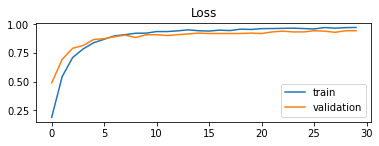

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [ ]:
test_metrics = model.evaluate(X_test, pd.get_dummies(y_test), verbose=0)

In [ ]:
test_metrics

[0.1302231401205063, 0.9638888835906982]